In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('2013-11-03_tromso_stromsgodset_raw_first.csv')

In [3]:
print (data)

       Timestamp  Tag ID    x_pos     y_pos   heading  direction      energy  \
0        01:09.0       9  32.2538  12.72430  0.234750   0.000000   254.04000   
1        01:09.0      13  21.1081  17.61800  1.413400   1.741270   202.25000   
2        01:09.0      14  28.5255  17.53590  1.640910  -3.038100   190.64800   
3        01:09.0      10  45.2474  14.46180  1.129020   0.000000   342.24400   
4        01:09.0       8  28.5504  39.54940  0.927515   2.527040   304.31900   
5        01:09.0       5  35.5428  30.31170  1.040150  -0.170872   364.37400   
6        01:09.0      15  50.1131  25.70310  0.998494   2.717390   312.28500   
7        01:09.0       2  26.6202  29.47660  0.809050   0.881905   150.66900   
8        01:09.0       1  53.1384  44.06200  2.127050   0.000000   143.88800   
9        01:09.0      12  74.5904  71.04800 -0.965478   0.000000     2.36761   
10       01:09.0       7  41.5713  38.66240  2.303420  -2.262020   264.25400   
11       01:09.1       9  32.2538  12.72

In [4]:
data_1 = data.loc[data['Tag ID'] == 10].reset_index()
print (data_1)

        index Timestamp  Tag ID    x_pos     y_pos   heading  direction  \
0           3   01:09.0      10  45.2474  14.46180  1.129020   0.000000   
1          14   01:09.1      10  45.2474  14.46180  1.128870   0.000000   
2          25   01:09.1      10  45.2474  14.46180  1.128080   0.000000   
3          36   01:09.2      10  45.2474  14.46180  1.127140   0.000000   
4          47   01:09.2      10  45.2474  14.46180  1.126060   0.000000   
5          58   01:09.3      10  45.2474  14.46180  1.121490   0.000000   
6          69   01:09.3      10  45.2474  14.46180  1.116700   0.000000   
7          80   01:09.4      10  45.1139  14.45020  1.109390   2.998990   
8          91   01:09.4      10  45.1145  14.44460  1.099080   3.037100   
9         102   01:09.5      10  45.1148  14.43890  1.089940   3.110810   
10        113   01:09.5      10  45.1147  14.43330  1.079540  -3.104700   
11        124   01:09.6      10  45.1142  14.42770  1.062510  -3.049610   
12        135   01:09.6  

In [5]:
v = data_1['speed'].values

In [6]:
def distance(x, y):
    return np.sqrt((x[1] - x[0])**2 + (y[1]-y[0])**2)

In [7]:
def transform(x, y):
    theta = np.arctan2(y[1] - y[0], x[1] - x[0]) - np.arctan2(y[2]-y[1], x[2] - x[1])
    r = distance([x[1], x[2]], [y[1], y[2]])
    return r, theta

In [8]:
polar = pd.DataFrame(columns = ['r', 'theta'])

In [9]:
k = 0

In [10]:
for i in range(data_1.shape[0]-2):
    x = data_1.loc[i:i+2]['x_pos'].values
    y = data_1.loc[i:i+2]['y_pos'].values
    r, theta = transform(x, y)
    if r < 1:
        polar.loc[k] = [r, theta]
        k = k + 1

## For univariate KDE, combining r and theta as one variable for position (used by Brefeld)

In [17]:
print (polar.values.std(ddof = 1))

0.38841512969404435


## For multivariate KDE, treating r and theta as different variables

In [15]:
print (polar['r'].values.std(ddof = 1))

0.0772970364383424


In [18]:
print (polar['theta'].values.std(ddof = 1))

0.5370991116703289


## Bandwidth estimation using Silverman's rule of thumb for univariate data

In [20]:
print ((4.0*polar.values.std(ddof = 1)**5/(3.0*polar.shape[0]))**(0.2))

0.04609313388324468


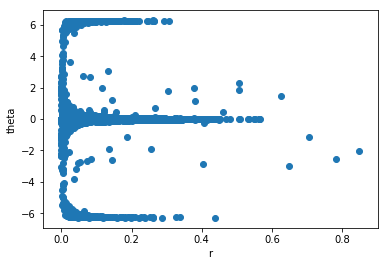

In [21]:
plt.scatter(polar['r'].values, polar['theta'].values)
plt.xlabel('r')
plt.ylabel('theta')
plt.show()

## Generating the 2-D Kernel Density Estimate

In [13]:
import scipy.stats

In [46]:
kernel = scipy.stats.gaussian_kde(polar.loc[0: 1000], bw_method = 'scott')

TypeError: float() argument must be a string or a number, not 'gaussian_kde'

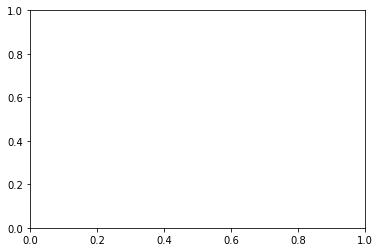

In [41]:
fig = plt.figure()
ax = fig.gca()
cset = ax.contour(polar, kernel, cmap = 'Blues')
plt.show()

In [47]:
res = kernel.pdf(polar.loc[1000:2000])

/opt/conda/lib/python3.6/site-packages/scipy/stats/kde.py:224: RuntimeWarning: invalid value encountered in true_divide
  result = result / self._norm_factor


In [48]:
print (res)

[nan inf]
